In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv("mushrooms.csv")

column_names = df.columns
categorical_clms = column_names[1:]
print(categorical_clms)
df.head()

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


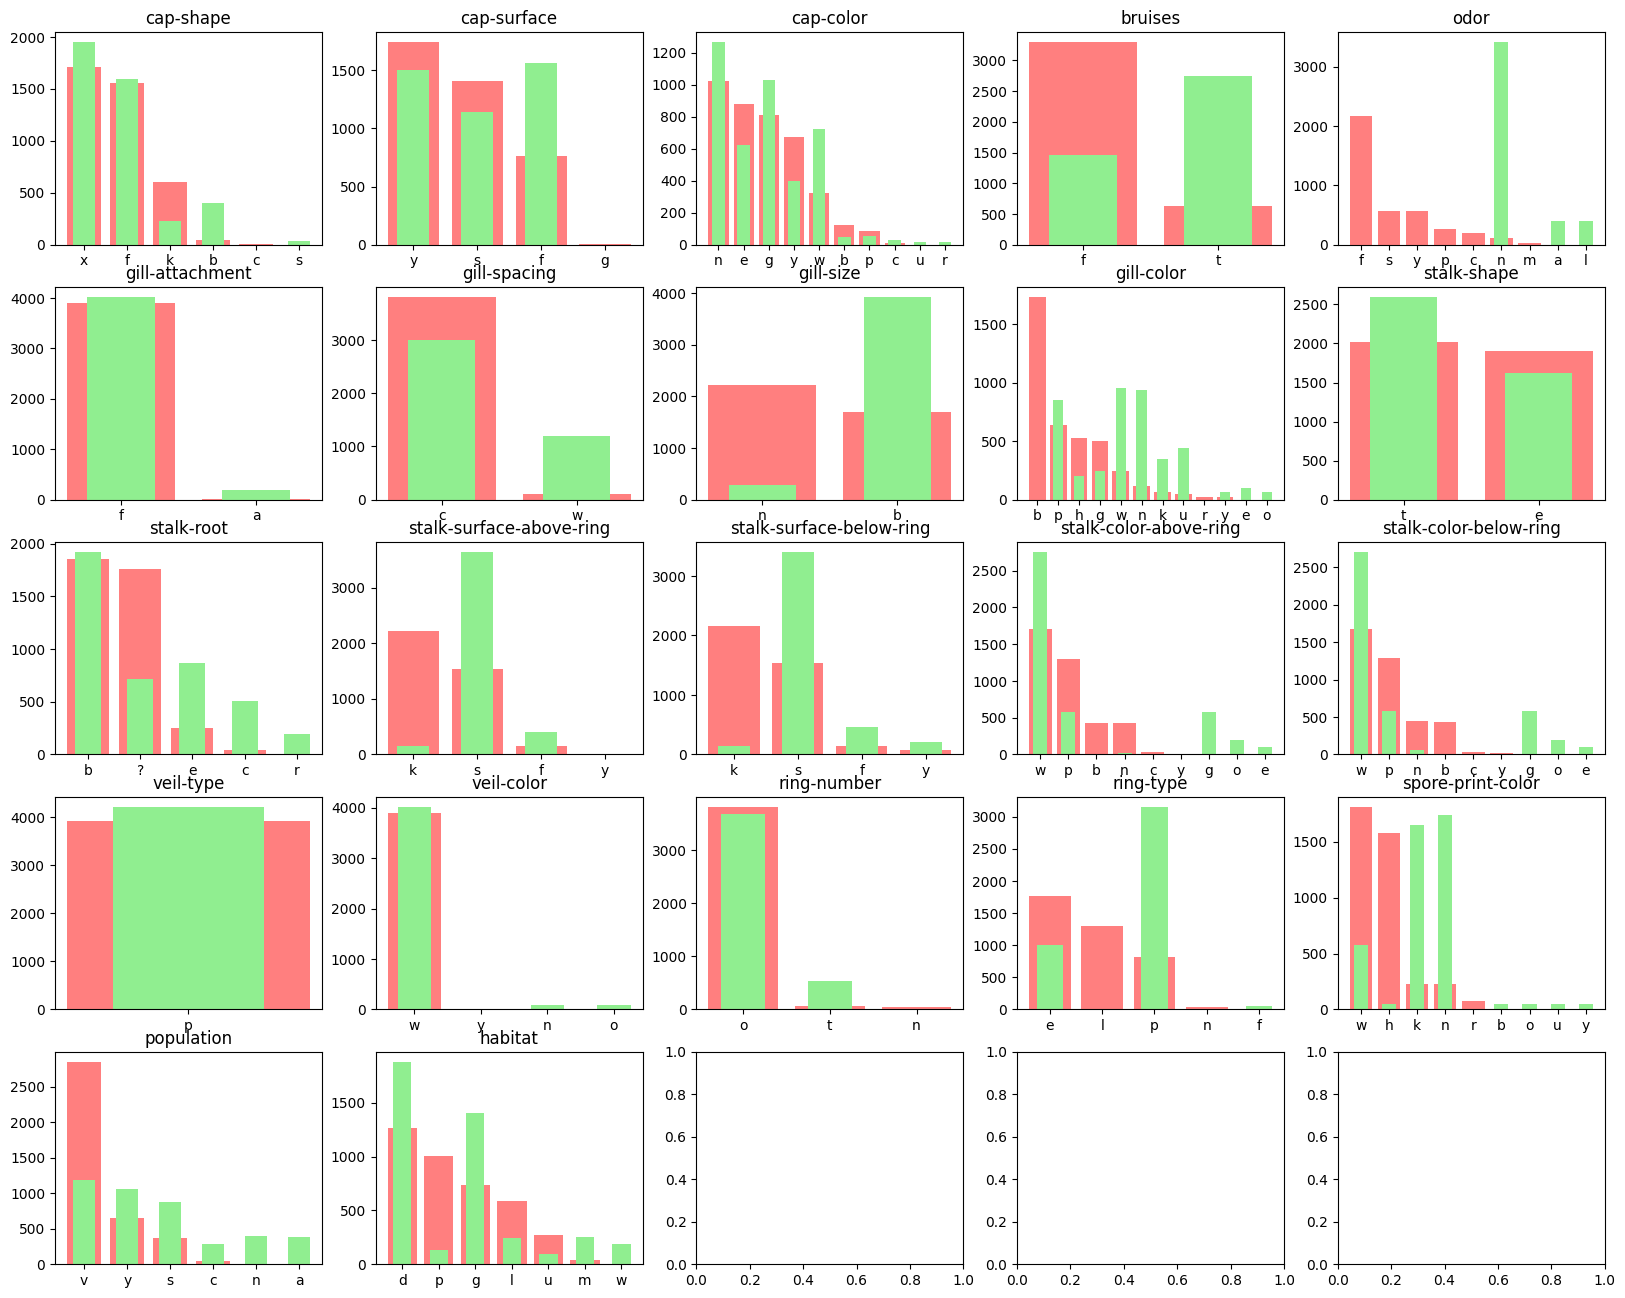

In [4]:
fig, axs = plt.subplots(5, 5, figsize=[20, 16])

df_counts = pd.DataFrame()

for column, ax in zip(categorical_clms, axs.ravel()[:len(column_names)]):
    dt = df.groupby('class')[column].value_counts()
    ax.bar(dt['p'].index, height=dt['p'].values, label='possion', color='red', alpha=0.5)
    ax.bar(dt['e'].index, height=dt['e'].values, label='edible', width=0.5, color='lightgreen')
    ax.set(title=column)
    dt = df.groupby(column)['class'].value_counts().unstack()
    dt = dt.rename(index=lambda x: dt.index.name + '_' + x )
    df_counts = pd.concat([df_counts, dt])
# RC квадрта таблица для оценки дизбланса Xi ^ 2

plt.show()

In [5]:
mushroom_df = pd.read_csv("mushrooms.csv")
features = categorical_clms
result_data = []

for feature in features:
    y_pred = mushroom_df.apply(lambda row: df_counts.T[f"{feature}_{row[feature]}"].idxmax(), axis=1)
    accuracy = accuracy_score(mushroom_df['class'], y_pred)
    result_data.append({'Feature': feature, 'Accuracy': accuracy})
counts_preds = pd.DataFrame(result_data)

In [6]:
counts_preds_sorted = counts_preds.sort_values(by='Accuracy', ascending=False)
counts_preds_sorted

,Feature,Accuracy
4,odor,0.985229
19,spore-print-color,0.868045
8,gill-color,0.805022
18,ring-type,0.775480
11,stalk-surface-above-ring,0.774495
12,stalk-surface-below-ring,0.766125
7,gill-size,0.756278
3,bruises,0.743968
20,population,0.721812
13,stalk-color-above-ring,0.716396


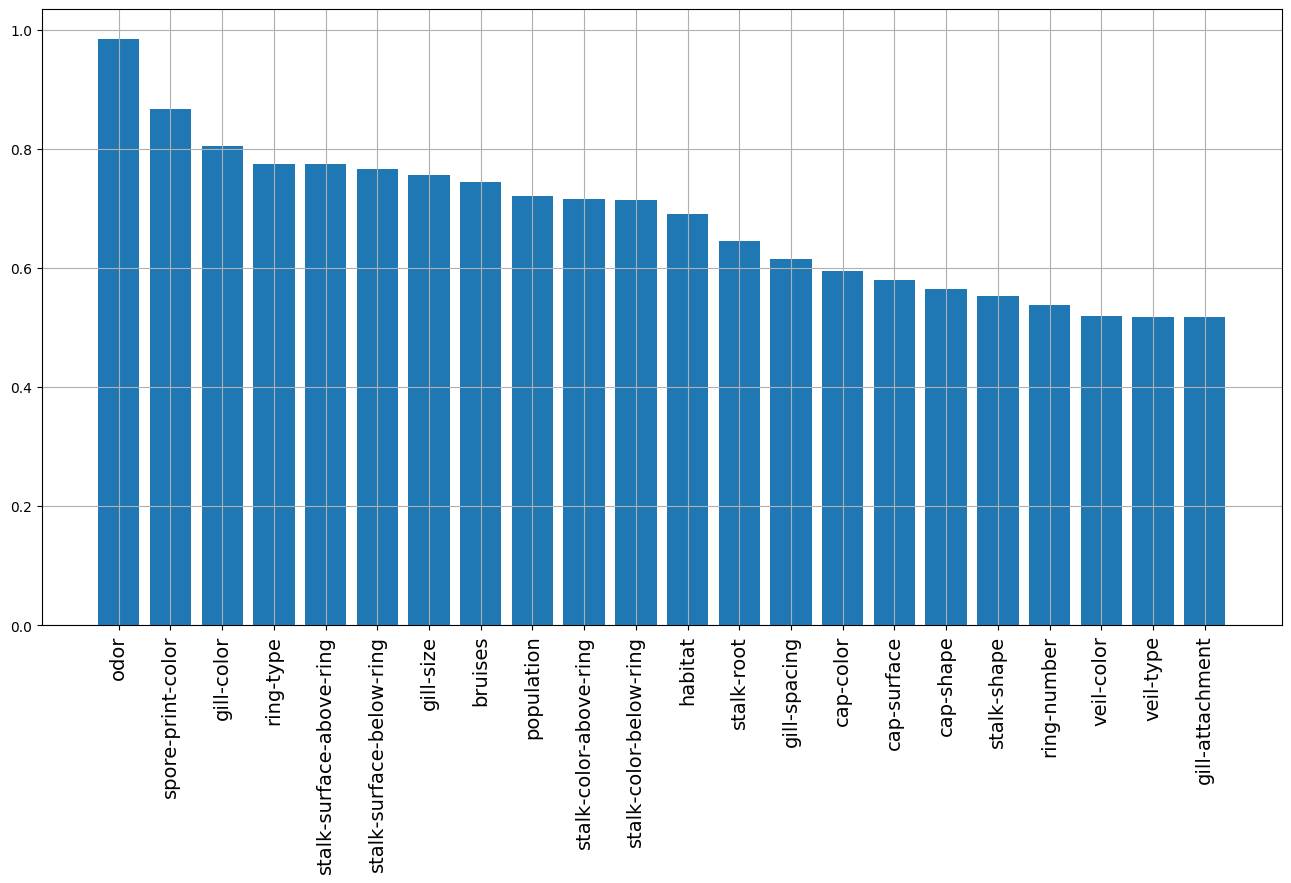

In [7]:
fig = plt.figure(figsize=(16, 8))
plt.bar(counts_preds_sorted.T.iloc[0].to_list(), counts_preds_sorted.T.iloc[1].to_list())
plt.xticks(fontsize=14,rotation=90)
plt.grid()
plt.show()

In [8]:
data = pd.read_csv("mushrooms.csv")

xs = data.drop('class', axis=1)
ys = data['class']

xs = pd.get_dummies(xs)

X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      0.92      0.96       843
           p       0.92      1.00      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



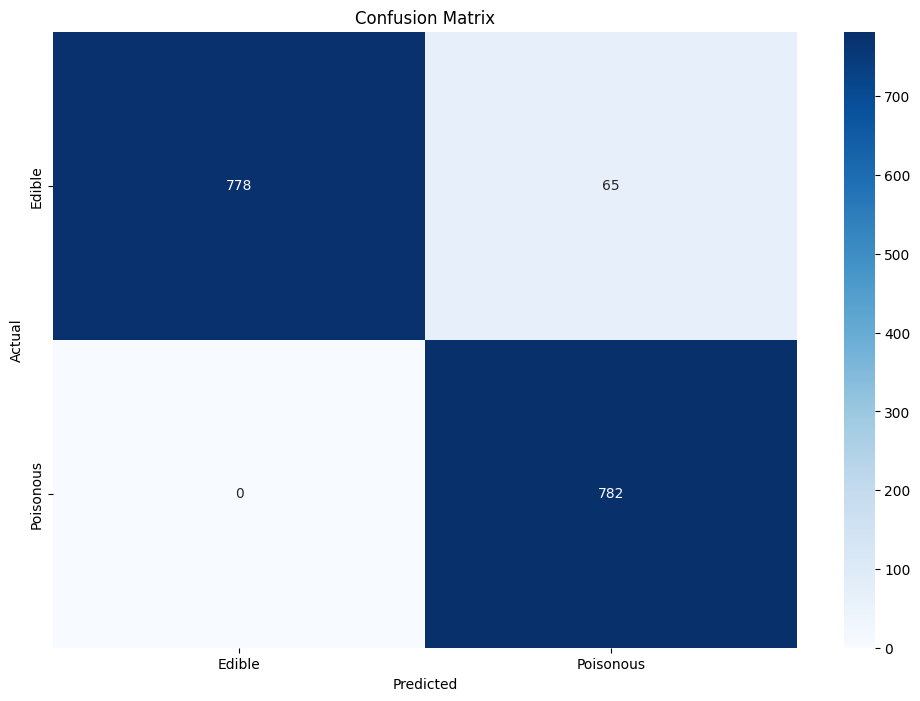

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
class NaiveBayes:
    def __init__(self):
        # Словарь для хранения априорных вероятностей классов
        self.class_probabilities = {}
        # Словарь для хранения средних значений и дисперсий признаков для каждого класса
        self.mean_variances = {}
        # Список уникальных классов
        self.classes = []

    def fit(self, X, y):
        # Получение уникальных классов в целевой переменной
        self.classes = np.unique(y)
        # Общее количество обучающих примеров
        total_samples = len(y)
        for class_label in self.classes:
            # Выбор обучающих примеров для данного класса
            class_samples = X[y == class_label]
            # Вычисление априорной вероятности класса
            self.class_probabilities[class_label] = len(class_samples) / total_samples
            # Список для хранения средних значений и дисперсий признаков
            self.mean_variances[class_label] = []
            for feature_index in range(X.shape[1]):
                # Выбор значений признака для данного класса
                feature_values = class_samples[:, feature_index]
                # Вычисление среднего и дисперсии значений признака
                mean = np.mean(feature_values)
                variance = np.var(feature_values)
                self.mean_variances[class_label].append((mean, variance))

    def calculate_likelihood(self, x, mean, variance):
        # Вычисление плотности вероятности для нормального распределения
        epsilon = 1e-16
        exponent = np.exp(-((x - mean) ** 2) / (2 * variance + epsilon))
        likehood = (exponent / (np.sqrt(2 * np.pi * variance) + epsilon))
        return likehood
    
    def ___calculate_likelihood(self, x, mean, variance):
        epsilon = 1e-16
        exponent = np.exp(-((x - mean) ** 2) / (2 * variance + epsilon))
        likehood = (exponent / (np.sqrt(2 * np.pi * variance) + epsilon))
        likehood = np.clip(likehood, epsilon, None)
        return likehood

    def predict(self, X):
        predictions = []
        for sample in X:
            class_scores = {}
            for class_label in self.classes:
                # Получение априорной вероятности класса
                class_probability = self.class_probabilities[class_label]
                # Вычисление плотностей вероятности для признаков и их произведение
                likelihoods = np.array([self.calculate_likelihood(sample[i], mean, variance)
                                        for i, (mean, variance) in enumerate(self.mean_variances[class_label])])
                # Вычисление апостериорной вероятности для класса
                posterior = class_probability * np.prod(likelihoods)
                class_scores[class_label] = posterior
            # Выбор класса с наибольшей апостериорной вероятностью
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
        return predictions


In [11]:
data = pd.read_csv("mushrooms.csv")

xs = data.drop('class', axis=1)
ys = data['class']

xs = pd.get_dummies(xs)

X_train, X_test, y_train, y_test = train_test_split(xs.values, ys, test_size=0.2, random_state=42)

nb_classifier = NaiveBayes()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

d:\Programming\TeorStat\venv\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
d:\Programming\TeorStat\venv\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


              precision    recall  f1-score   support

           e       0.99      0.99      0.99       843
           p       0.99      0.98      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



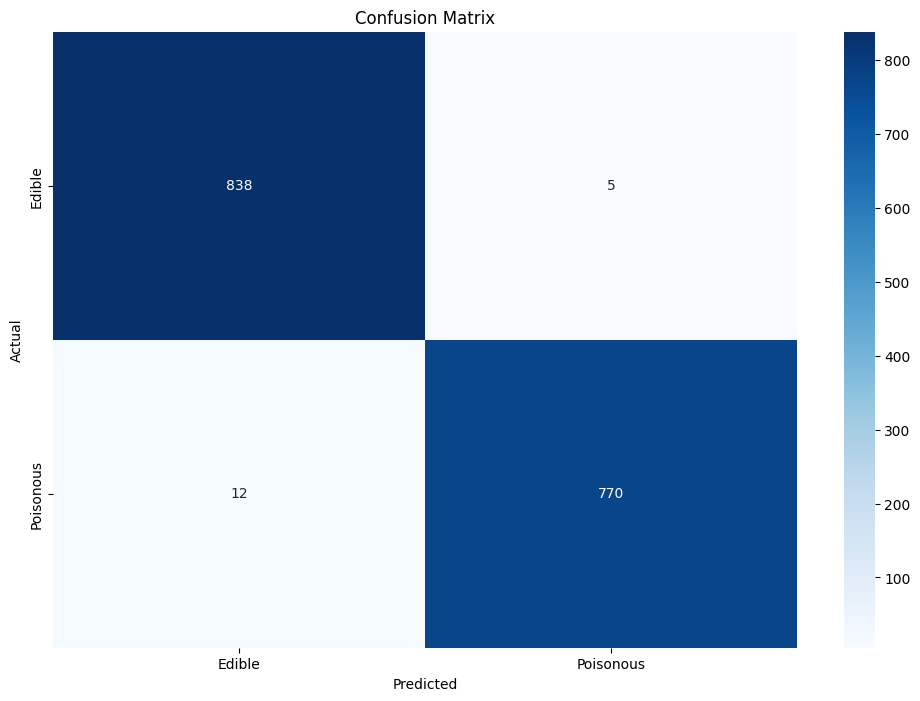

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
mushroom_df = pd.read_csv("mushrooms.csv")
features = categorical_clms

df_ = pd.read_csv("mushrooms.csv", header=None).drop(0, axis=0)
df = pd.DataFrame()

result_data = []

for idx, feature in (bar := tqdm(enumerate(features, 1), total=len(features))):
    bar.set_description(f"calc for '{feature}'")
    value_counts = df_.groupby(idx)[0].value_counts().unstack()
    probabilities = value_counts['p'] / (value_counts['p'] + value_counts['e'])

    df[f"Probability_{feature}"] = mushroom_df[feature].map(probabilities)
    df[f"Logit_{feature}"] = np.log(df[f"Probability_{feature}"] / (1 - df[f"Probability_{feature}"]))
    df[f"After_Sigmoid_{feature}"] = 1 / (1 + np.exp(-df[f"Logit_{feature}"]))
    
    accuracy = accuracy_score(mushroom_df['class'], df[f"After_Sigmoid_{feature}"].apply(lambda x: 'e' if x <= 0.5 else 'p'))
    result_data.append({'Feature': feature, 'Accuracy': accuracy})
accur_classes = pd.DataFrame(result_data)
df

  0%|          | 0/22 [00:00<?, ?it/s]

,Probability_cap-shape,Logit_cap-shape,After_Sigmoid_cap-shape,Probability_cap-surface,Logit_cap-surface,After_Sigmoid_cap-surface,Probability_cap-color,Logit_cap-color,After_Sigmoid_cap-color,Probability_bruises,...,After_Sigmoid_ring-type,Probability_spore-print-color,Logit_spore-print-color,After_Sigmoid_spore-print-color,Probability_population,Logit_population,After_Sigmoid_population,Probability_habitat,Logit_habitat,After_Sigmoid_habitat
0,0.467177,-0.131480,0.467177,0.552426,0.210476,0.552426,0.446585,-0.214479,0.446585,0.184834,...,0.205645,0.119658,-1.995672,0.119658,0.294872,-0.871839,0.294872,0.739130,1.041454,0.739130
1,0.467177,-0.131480,0.467177,0.552426,0.210476,0.552426,0.626866,0.518794,0.626866,0.184834,...,0.205645,0.113821,-2.052291,0.113821,NaN,NaN,NaN,0.344507,-0.643275,0.344507
2,0.106195,-2.130214,0.106195,0.552426,0.210476,0.552426,0.307692,-0.810930,0.307692,0.184834,...,0.205645,0.113821,-2.052291,0.113821,NaN,NaN,NaN,0.123288,-1.961659,0.123288
3,0.467177,-0.131480,0.467177,0.536375,0.145757,0.536375,0.307692,-0.810930,0.307692,0.184834,...,0.205645,0.119658,-1.995672,0.119658,0.294872,-0.871839,0.294872,0.739130,1.041454,0.739130
4,0.467177,-0.131480,0.467177,0.552426,0.210476,0.552426,0.439130,-0.244692,0.439130,0.693345,...,0.636888,0.113821,-2.052291,0.113821,NaN,NaN,NaN,0.344507,-0.643275,0.344507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.724638,0.967584,0.724638,0.552426,0.210476,0.552426,0.446585,-0.214479,0.446585,0.693345,...,0.205645,NaN,NaN,NaN,0.152941,-1.711717,0.152941,0.711538,0.902868,0.711538
8120,0.467177,-0.131480,0.467177,0.552426,0.210476,0.552426,0.446585,-0.214479,0.446585,0.693345,...,0.205645,NaN,NaN,NaN,0.704950,0.870984,0.704950,0.711538,0.902868,0.711538
8121,0.493655,-0.025382,0.493655,0.552426,0.210476,0.552426,0.446585,-0.214479,0.446585,0.693345,...,0.205645,NaN,NaN,NaN,0.152941,-1.711717,0.152941,0.711538,0.902868,0.711538
8122,0.724638,0.967584,0.724638,0.536375,0.145757,0.536375,0.446585,-0.214479,0.446585,0.693345,...,0.636888,0.758794,1.146079,0.758794,0.704950,0.870984,0.704950,0.711538,0.902868,0.711538


In [14]:
accur_classes_sorted = accur_classes.sort_values(by='Accuracy', ascending=False)
accur_classes_sorted

,Feature,Accuracy
4,odor,0.886755
19,spore-print-color,0.844412
8,gill-color,0.785327
11,stalk-surface-above-ring,0.774495
18,ring-type,0.769572
12,stalk-surface-below-ring,0.766125
7,gill-size,0.756278
3,bruises,0.743968
21,habitat,0.666667
20,population,0.625308


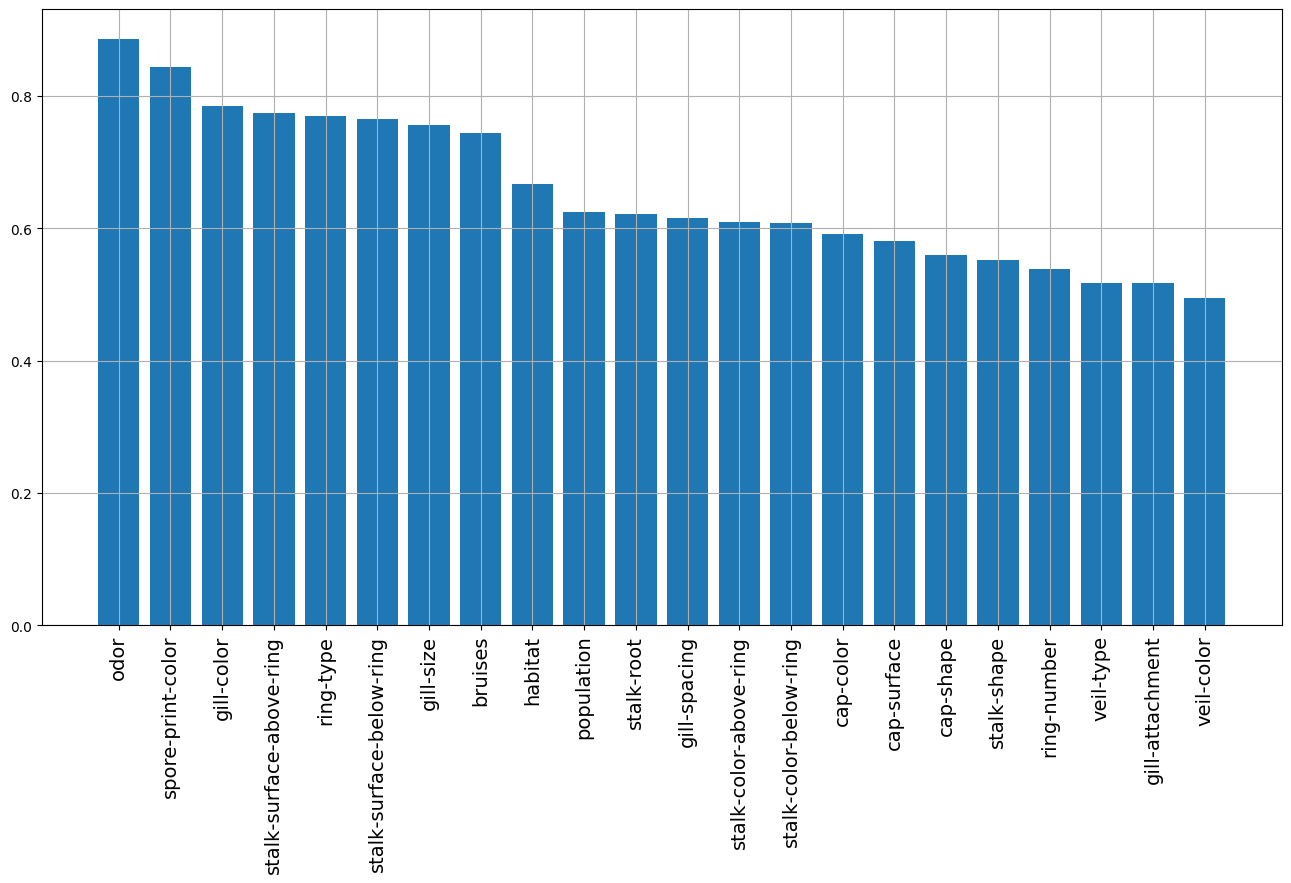

In [15]:
fig = plt.figure(figsize=(16, 8))
plt.bar(accur_classes_sorted.T.iloc[0].to_list(), accur_classes_sorted.T.iloc[1].to_list())
plt.xticks(fontsize=14,rotation=90)
plt.grid()
plt.show()